In [1]:
from modules import socrata_tools as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

__APP_TOKEN = '1UDvLapXXQY4bBsuwS1Xr7A1K'

## Descarregant les dades de Sòcrata

https://analisi.transparenciacatalunya.cat/Sector-P-blic/Contractaci-de-la-Generalitat-de-Catalunya-Contrac/ydq4-xy5b

In [2]:
dataset_id = 'ydq4-xy5b'
df = st.get_pandas_from_dataset_id(dataset_id, st.__get_socrata_client(__APP_TOKEN))

## Formatejar les dades

In [3]:
df['data_adjudicacio'] = pd.to_datetime(df['data_adjudicacio'], errors='coerce') # TODO - There can be dates with bad format
df['import_adjudicacio'] = pd.to_numeric(df['import_adjudicacio'], errors='coerce') # TODO - There can be dates with bad format
df.head(3)

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
0,TAKEDA FARMACEUTICA ESPAÑA S.A. UNIPERSONAL,DEPARTAMENT DE SALUT,0,NaN,947_CORTICOIDES,"SUBMINISTRAMENT DE CORTICOIDES SISTEMICS, MONO...",2015-12-31,"SUBMINISTRAMENT DE CORTICOIDES SISTEMICS, MONO...",0,2015,4562.50,N,0,1,Corporació Sanitària Parc Taulí de Sabadell,Menor,Departaments i Sector Públic de la Generalitat...,SUBMINISTRAMENTS
1,"SANOFI-AVENTIS, SA",DEPARTAMENT DE SALUT,0,33690000-3,6496_50579_T4_4,Fàrmacs Especifics,2017-10-01,Fàrmacs Especifics,0,2017,232.56,N,3,1,Corporació Sanitària Parc Taulí de Sabadell,Menor,Departaments i Sector Públic de la Generalitat...,3. SUBMINISTRAMENTS
2,"ABBOTT LABORATORIES, SA",DEPARTAMENT DE SALUT,0,33680000-0,4050267670,COMPRA DE FARMACIA,2018-04-13,COMPRA DE FARMACIA,1,2018,179.98,N,0,1,Institut Català de la Salut (ICS) Tarragona Ho...,Menor,Departaments i Sector Públic de la Generalitat...,3. SUBMINISTRAMENTS


## Netejar les dades

In [4]:
# La tipologia de contracte està duplicada i en formats diferents
replace_dict = {
    '1. OBRES': 'OBRES', 'OBRES':'OBRES',
    '2. GESTIÓ DE SERVEI PÚBLIC': 'GESTIÓ DE SERVEI PÚBLIC', 'GESTIÓ DE SERVEI PÚBLIC':'GESTIÓ DE SERVEI PÚBLIC',
    '3. SUBMINISTRAMENTS': 'SUBMINISTRAMENTS', 'SUBMINISTRAMENTS':'SUBMINISTRAMENTS',
    '5. SERVEIS':'SERVEIS', 'SERVEIS': 'SERVEIS',
    '6. ADMINISTRATIU ESPECIAL':'ADMINISTRATIU ESPECIAL', 'ADMINISTRATIU ESPECIAL': 'ADMINISTRATIU ESPECIAL'    
}

df['tipus_contracte'] = df['tipus_contracte'].map(replace_dict)

# La hi ha empreses amb diferents noms

df.loc[df['adjudicatari'] == 'SERVEIS, OBRES I MANTENIMENT, SL', 'adjudicatari'] = 'SERVEIS OBRES I MANTENIMENT, SL'

df['tipus_contracte'] = df['tipus_contracte'].map(replace_dict)


### Contractes de obres

In [5]:
df_obres = df.loc[(df['tipus_contracte'].isin(['OBRES']))]

Text(0.5, 1.0, '2018')

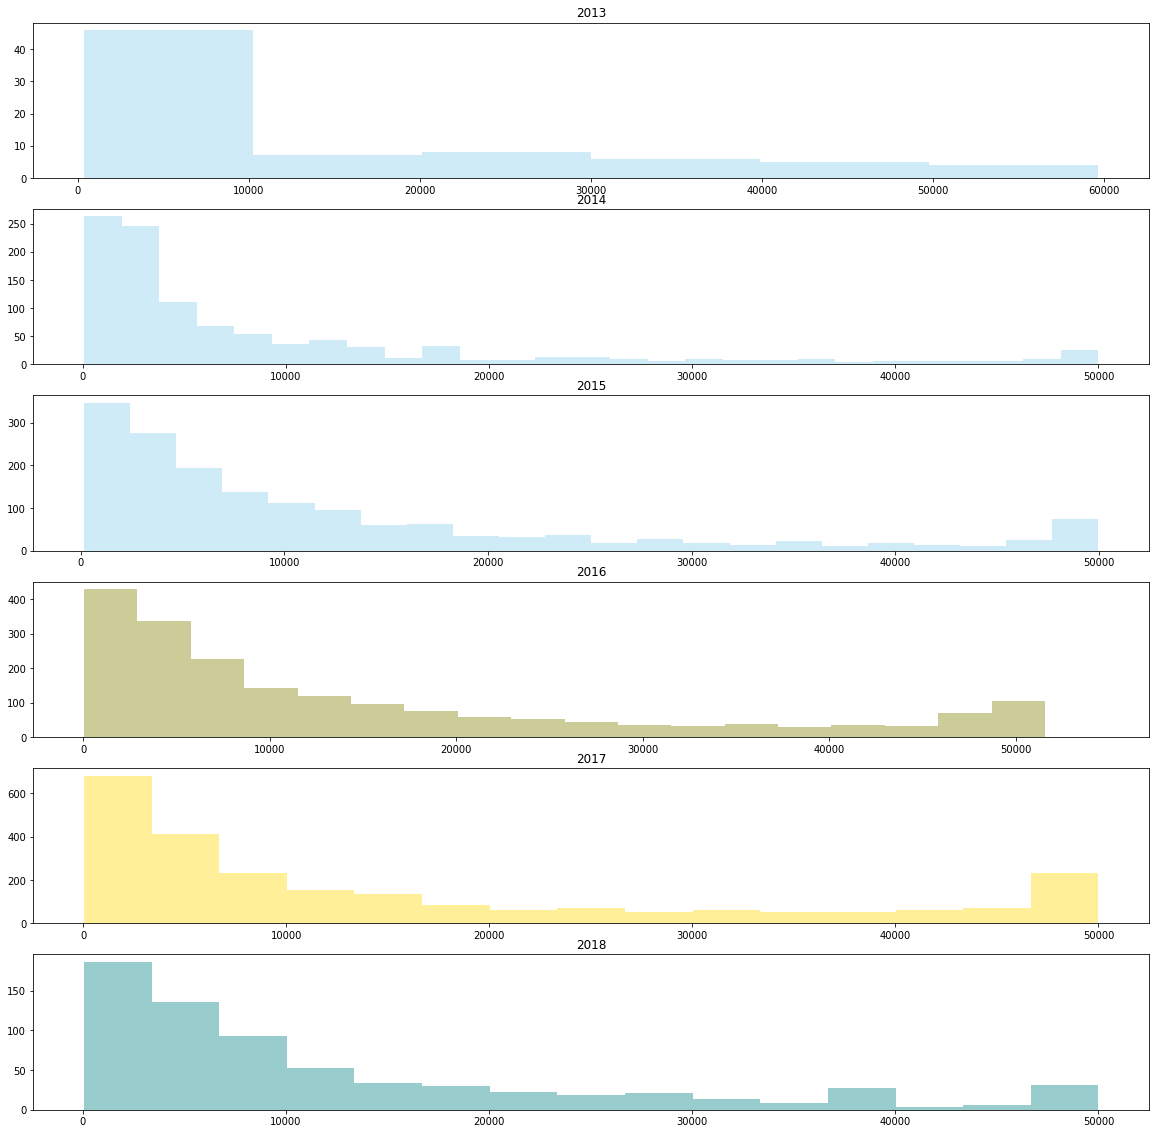

In [6]:
f, axes = plt.subplots(6,1, figsize=(20, 20));
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2013']['import_adjudicacio'] , color="skyblue", ax=axes[0], kde = False, axlabel = False)
axes[0].set_title("2013")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2014']['import_adjudicacio'] , color="skyblue", ax=axes[1], kde = False, axlabel = False)
axes[1].set_title("2014")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2015']['import_adjudicacio'] , color="skyblue", ax=axes[2], kde = False, axlabel = False)
axes[2].set_title("2015")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2016']['import_adjudicacio'] , color="olive", ax=axes[3], kde = False, axlabel = False)
axes[3].set_title("2016")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2017']['import_adjudicacio'] , color="gold", ax=axes[4], kde = False, axlabel = False)
axes[4].set_title("2017")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2018']['import_adjudicacio'] , color="teal", ax=axes[5], kde = False, axlabel = False)
axes[5].set_title("2018")

#f.show()

És curiós que l'import d'adjudicació augmenta quan s'apropa al límit dels 50K€ en tots els anys amb dates, excepte al 2018 que amb el canvi de llei també apareix un augment dels contractes de 40K€.

In [8]:
df.loc[df['adjudicatari'] == 'Pavimentos y']

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
7876,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2016-1073,"08040540,I.El Cairat,Esparreguera,arranjament ...",2016-11-10,"08040540,I.El Cairat,Esparreguera,arranjament ...",7,2016,1895.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
8032,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-1409,"08040540,I.El Cairat,Esparreguera,arranjament ...",2017-10-10,"08040540,I.El Cairat,Esparreguera,arranjament ...",7,2017,1750.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
13226,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-132,"08015961,E.Jacint Verdaguer,Castelldefels, ins...",2017-02-17,"08015961,E.Jacint Verdaguer,Castelldefels, ins...",28,2017,7272.35,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
17383,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-1230,"E.Pau Vila, Esparreguera, arranj.canals recoll...",2017-07-27,"E.Pau Vila, Esparreguera, arranj.canals recoll...",61,2017,37700.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
35836,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-316,"08043401,E.Barrufet,St.Boi Llobregat,reparació...",2017-03-22,"08043401,E.Barrufet,St.Boi Llobregat,reparació...",30,2017,6100.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
43210,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2015-89,"08025344,E.Amat Verdú,St.Boi Llobregat, repara...",2015-02-26,"08025344,E.Amat Verdú,St.Boi Llobregat, repara...",32,2015,20125.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
43410,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2016-330,"08044247,E.Estel, Molins de Rei, reparació jar...",2016-04-28,"08044247,E.Estel, Molins de Rei, reparació jar...",123,2016,7780.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
48595,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-1099,"08016410,E.Sant Ildefons,Cornellà Llob, adequa...",2017-07-17,"08016410,E.Sant Ildefons,Cornellà Llob, adequa...",62,2017,42876.48,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
51851,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-1232,"08014814 E. El Bruc, El Bruc, Adequació aula",2017-07-28,"08014814 E. El Bruc, El Bruc, Adequació aula",31,2017,4130.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
57606,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-802,"08033985,I.Sant Just,St.Just Desvern,substituc...",2017-06-15,"08033985,I.Sant Just,St.Just Desvern,substituc...",62,2017,29890.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES


In [9]:
df_obres.groupby(['adjudicatari', 'exercici', 'agrupacio_organisme']).agg(['count', 'sum'])

anys_durada  \
                                                                                                                     count   
adjudicatari                                       exercici agrupacio_organisme                                              
"FORMA FUSTA" Miquel Fargas Valero                 2014     DEPARTAMENT DE CULTURA                                       3   
- Construesfera, S.L.                              2017     DEPARTAMENT DE CULTURA                                       1   
10 GAS INSTALACIONES SLU                           2016     DEPARTAMENT DE CULTURA                                       1   
1953 GRUP SOLER CONSTRUCTORA, S.L.                 2018     DEPARTAMENT DE GOVERNACIÓ, ADMINISTRACIONS PÚBL...           1   
                                                            DEPARTAMENT DE SALUT                                         1   
1953 GRUP SOLER CONSTRUCTORA, SL                   2017     DEPARTAMENT DE GOVERNACIÓ, ADMINISTRACIONS PÚBL...           1   
                                                   2018     DEPARTAMENT DE GOVERNACIÓ, ADMINISTRACIONS PÚBL...           1   
                                                            DEPARTAMENT DE JUSTÍCIA                                      1   
1953GRUP SOLER CONSTRUCTORA, AL                    2014     DEPARTAMENT DE CULTURA                                       1   
                                                   2016     DEPARTAMENT D'EDUCACIÓ                                       1   
3RH PONENT SL                                      2015     DEPARTAMENT D'EDUCACIÓ                                       1   
                                                   2016     DEPARTAMENT D'EDUCACIÓ                                       8   
                                                   2017     DEPARTAMENT D'EDUCACIÓ                                       1   
9 TEAM GRUP CONSTRUCTOR                            2016     DEPARTAMENT D'EDUCACIÓ                                       2   
                                                   2018     DEPARTAMENT D'EDUCACIÓ                                       1   
A+D SERVEIS                                        2016     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             1   
A. SALA TALLERES METÁLICOS, SA                     2016     DEPARTAMENT DE LA VICEPRESIDÈNCIA, I D'ECONOMIA...           3   
A.J. INGENIERIA,                                   2014     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             3   
                                                   2016     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             2   
A.P. SISTEMES ELECTRÒNICS, SC                      2014     DEPARTAMENT D'EDUCACIÓ                                       1   
AARON EDUARDO SPIVAK EPSTEIN                       2017     DEPARTAMENT D'EDUCACIÓ                                       1   
AB Aucatel Inspección y Control, SLU               2017     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             1   
ABAC, CONSERVACIÓ                                  2014     DEPARTAMENT DE CULTURA                                       1   
                                                   2017     DEPARTAMENT DE CULTURA                                       1   
ABANS Serveix Culturals, SL                        2016     DEPARTAMENT DE CULTURA                                       1   
ABANTIA INSTALACIONES, SA, Sociedad Unipersonal    2014     DEPARTAMENT DE SALUT                                         5   
                                                   2015     DEPARTAMENT DE SALUT                                         1   
ABANTIA MANTENIMIENTO,                             2015     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             1   
ABANTIA MANTENIMIENTO, SA                          2016     DEPARTAMENT DE TERRITORI I SOSTENIBILITAT                    1   
ABELLO LINDE, S.A.                                 2016     DEPARTAMENT DE SALU

In [10]:
df_gestio = df.loc[(df['tipus_contracte'].isin(['GESTIÓ DE SERVEI PÚBLIC']))]
df_subministraments = df.loc[(df['tipus_contracte'].isin(['SUBMINISTRAMENTS']))]
df_serveis = df.loc[(df['tipus_contracte'].isin(['SERVEIS']))]
df_administratiu_especial = df.loc[(df['tipus_contracte'].isin(['ADMINISTRATIU ESPECIAL']))]



In [11]:
df.sort_values(by = 'import_adjudicacio', ascending = False).head()

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
83456,Consorci de la Zona Franca de Barcelona,DEPARTAMENT D'EMPRESA I CONEIXEMENT,3,70310000-7,16/13,Arrendament dels despatxos i places d'aparcame...,2016-02-01,Arrendament dels despatxos i places d'aparcame...,0,2016,369128.52,N,0,1,Consorci de Serveis Universitaris de Catalunya...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
6573,"FERSIX SERIGRAFIA, SL",DEPARTAMENT DE TERRITORI I SOSTENIBILITAT,1,71900000-7,CTN1400425,SUBMINISTRAMENT DE DIFERENT MATERIAL D'EQUIPS ...,2014-07-21,SUBMINISTRAMENT DE DIFERENT MATERIAL D'EQUIPS ...,0,2014,279906.00,N,0,1,Agència Catalana de l'Aigua,Menor,Departaments i Sector Públic de la Generalitat...,SUBMINISTRAMENTS
133644,"GARTNER ESPAÑA, SL",DEPARTAMENT DE LA PRESIDÈNCIA,0,48810000-9,CTTI-2016-207,Subscripció a les bases de dades de coneixemen...,2016-10-10,Subscripció a les bases de dades de coneixemen...,365,2016,206990.00,N,0,1,Centre de Telecomunicacions i Tecnologies de l...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
99729,"GARTNER ESPAÑA, SL",DEPARTAMENT DE LA PRESIDÈNCIA,0,48810000-9,CTTI-2015-343,Subscripció a les bases de dades de coneixemen...,2016-01-15,Subscripció a les bases de dades de coneixemen...,336,2016,206990.00,N,0,1,Centre de Telecomunicacions i Tecnologies de l...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
175643,"SUSTEC OUTSOURCING, SL",DEPARTAMENT DE CULTURA,0,79980000-7,CU-2016-590,Subscripció a les principals public.periòdique...,2016-09-14,Subscripció a les principals public.periòdique...,103,2016,198324.50,N,0,1,Departament de Cultura,Menor,Departaments i Sector Públic de la Generalitat...,SUBMINISTRAMENTS


In [12]:
#df[['tipus_contracte', ]].groupby(['tipus_contracte']).agg(['count'])

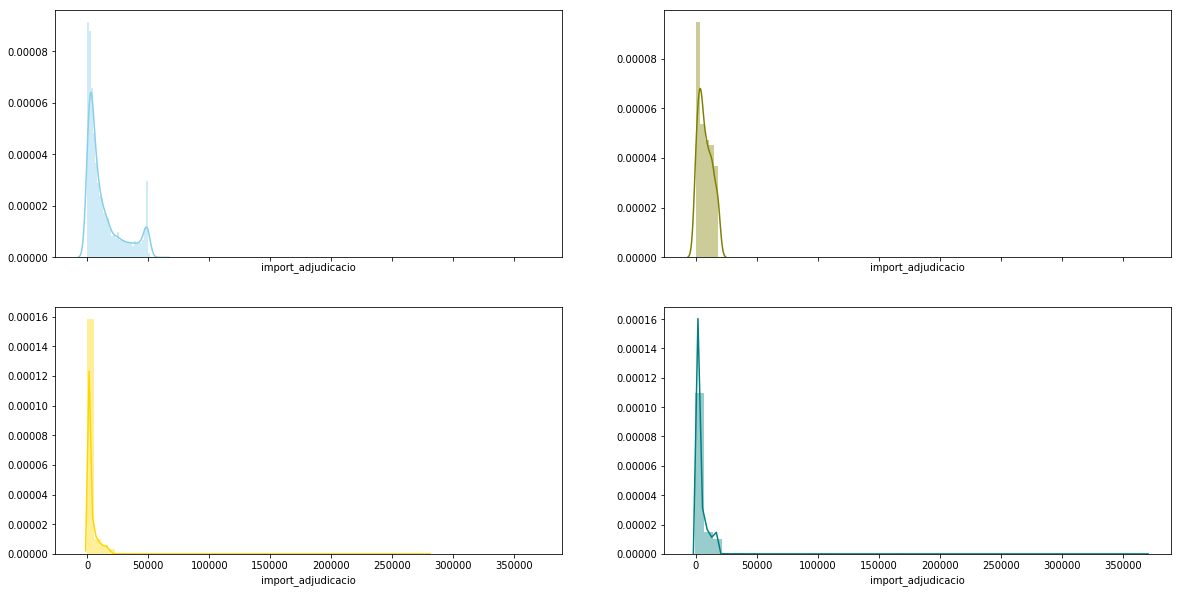

In [13]:
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.distplot( df_obres['import_adjudicacio'] , color="skyblue", ax=axes[0, 0])
sns.distplot( df_gestio['import_adjudicacio'] , color="olive", ax=axes[0, 1])
sns.distplot( df_subministraments['import_adjudicacio'] , color="gold", ax=axes[1, 0])
sns.distplot( df_serveis['import_adjudicacio'] , color="teal", ax=axes[1, 1])

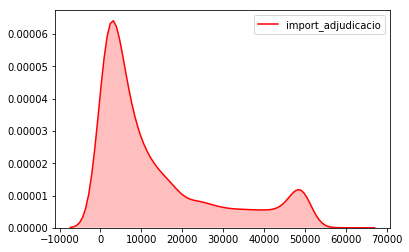

In [14]:
# plot of 2 variables
p1=sns.kdeplot(df_obres['import_adjudicacio'], shade=True, color="r")
#sns.plt.show()

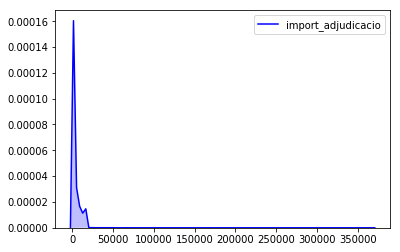

In [15]:
p1=sns.kdeplot(df_serveis['import_adjudicacio'], shade=True, color="b")


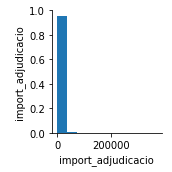

In [18]:
df[['adjudicatari','agrupacio_organisme']]

,adjudicatari,agrupacio_organisme
0,TAKEDA FARMACEUTICA ESPAÑA S.A. UNIPERSONAL,DEPARTAMENT DE SALUT
1,"SANOFI-AVENTIS, SA",DEPARTAMENT DE SALUT
2,"ABBOTT LABORATORIES, SA",DEPARTAMENT DE SALUT
3,"MUNDIPHARMA PHARMACEUTICALS, SL",DEPARTAMENT DE SALUT
4,"MUNDIGAS,S.L.",DEPARTAMENT DE TERRITORI I SOSTENIBILITAT
5,"SMITH & NEPHEW, SA Societat Unipersonal",DEPARTAMENT DE SALUT
6,JOSEFINA PUIG GUBIANES,DEPARTAMENT DE SALUT
7,"SERVEIS OBRES I MANTENIMENT, SL","DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES"
8,TEB FUNDACIÓ PEL TREBALL SOCIAL AMB LES TIC,"DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES"
9,"OBRES COM9, SL","DEPARTAMENT D'AGRICULTURA, RAMADERIA, PESCA, A..."


In [20]:
comptador_totals = df_obres['adjudicatari'].value_counts()
for empresa in comptador_totals.items():
    print(empresa)

('SERVEIS OBRES I MANTENIMENT, SL', 181)
('SERPA 2009 SL', 106)
('FOMENTO DE CONSTRUCCIONES Y CONTRATAS SA', 74)
('TECNICAS DE', 72)
('CONSTRUCCIONS BUSQUETS', 67)
('SPARK IBERICA, S.A.', 60)
('Sr. JUAN CARLOS GOMEZ FERNANDEZ', 52)
('PROYECTOS  Y LEGALIZACIONES INGESPA SL', 50)
('LOAL - LA INSTALADORA DEL VALLÉS,SL', 49)
('SERVICIOS GESTION', 49)
('SERVIOBRES QUERALT SL', 44)
('CLECE, SA', 42)
('METRO 7 SL', 41)
('CONSTRUCCIONS MAXI DEL VALLÈS,S.L.', 38)
('SOGESA INSTALACIONES INTEGRALES, SA, Sociedad Unipersonal', 37)
('CONSERVACION DE VIAS SAINZ, SA', 36)
('PLURIAMBIENT 2002', 36)
('IAMASSERVEIS, SL', 34)
('VILLA-REYES, SL INDUSTRIAL CONSTRUCTORA', 33)
('SOLER GLOBAL SERVICE, SL', 33)
('CONSTRUCCIONS P. ROCA, SA', 31)
("L'ARCA DEL", 31)
('CONSTRUCTORA COLUMBA, SL', 30)
('OBRAS Y CONSTRUCCIONES OSELMA 2000 SL', 29)
('TESLA INDUSTRIAL,', 29)
('OBRES I', 28)
('CONSTRUBA PROYECTOS Y EDIFICACIONES SL', 28)
('Pavimentos y', 28)
('OBRES I REFORMES DAYSON, SL', 27)
('CONSTRUCCIONS CAPSANA, S